In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Using pandas

In [51]:
df = pd.read_csv('category_data.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
986,987,50,RM,59.0,5310,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,117000
1236,1237,160,RL,36.0,2628,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,175500
1253,1254,60,RL,NaN,17542,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,294000
252,253,60,RL,65.0,8366,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,173000
1070,1071,20,RL,72.0,10152,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,135000


In [52]:
df.shape

(1460, 81)

In [53]:
df = df[['GarageQual','FireplaceQu','SalePrice']]

In [54]:
df.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [55]:
df.isnull().mean() * 100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

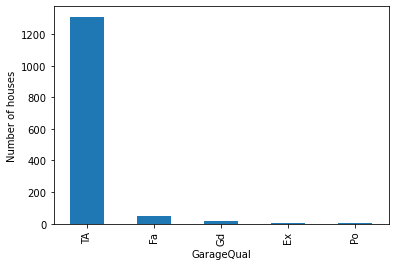

In [56]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [57]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

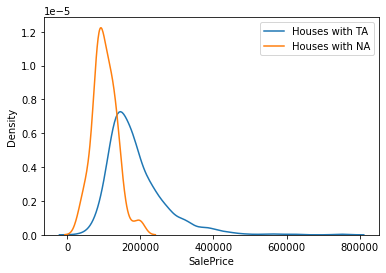

In [58]:
sns.kdeplot(df[df['GarageQual']=='TA']['SalePrice'],label = 'Houses with TA')
sns.kdeplot(df[df['GarageQual'].isnull()]['SalePrice'],label = 'Houses with NA')
plt.legend()

In [59]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [60]:
df['GarageQual'].fillna('TA',inplace = True)

<AxesSubplot:>

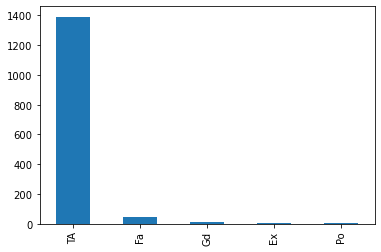

In [61]:
df['GarageQual'].value_counts().plot.bar()

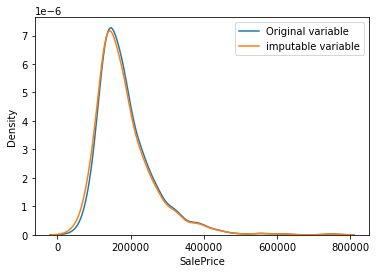

In [62]:
"""
As two graphs look similar that means there are less number of missing values. And because
the distributions are same we can use it for our model.
"""

sns.kdeplot(temp,label = 'Original variable')
sns.kdeplot(df[df['GarageQual'] == 'TA']['SalePrice'],label = 'imputable variable')
plt.legend()

For FireplaceQuality column

In [63]:
df['FireplaceQu'].isnull().sum()

690

<AxesSubplot:>

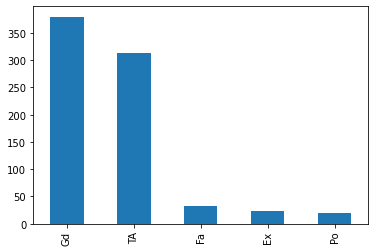

In [64]:
df['FireplaceQu'].value_counts().plot.bar()

In [65]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

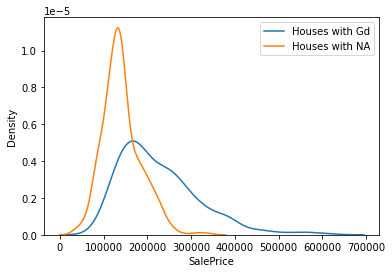

In [66]:
sns.kdeplot(df[df['FireplaceQu']=='Gd']['SalePrice'],label = 'Houses with Gd')
sns.kdeplot(df[df['FireplaceQu'].isnull()]['SalePrice'],label = 'Houses with NA')
plt.legend()

In [67]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [68]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<AxesSubplot:>

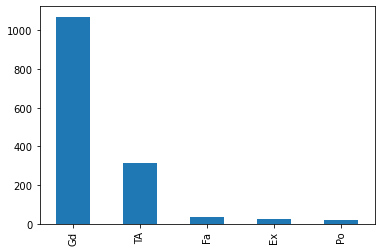

In [69]:
df['FireplaceQu'].value_counts().plot.bar()

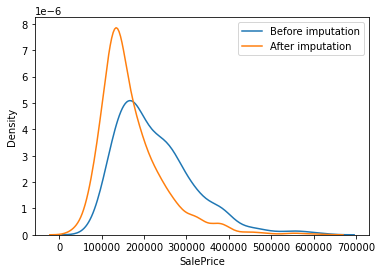

In [70]:
"""
For this column we will not work with frequent imputation as the distribution before and after
imputation doesn't look identical or close to identical
"""

sns.kdeplot(temp,label = 'Before imputation')
sns.kdeplot(df[df['FireplaceQu'] == 'Gd']['SalePrice'],label = 'After imputation')
plt.legend()

### Using sklearn

In [72]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [73]:
imputer = SimpleImputer(strategy='most_frequent')

In [74]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [75]:
imputer.statistics_

array(['TA', 'Gd'], dtype=object)